[0.6, 0.9, -27, 2.5, -24, 2.5, 0, 0]
len(xData)  32768
SW_Shiva_151
/Users/millerj/delete_me/SW_Shiva_151.txt


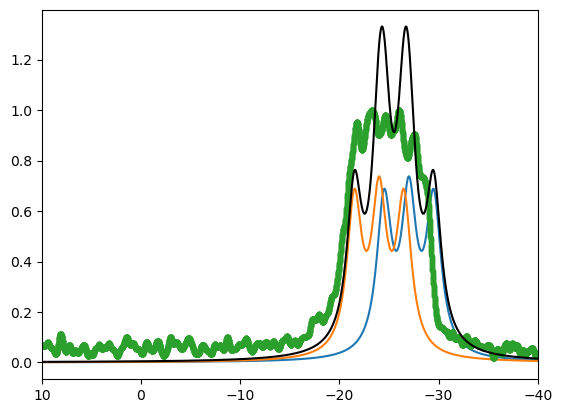

Finished with fitting
fit_center_1  -25.38786192529347      fit_split_1  2.847961175416784
fit_center_2  -23.959919209797878      fit_split_2  2.7822483561302414
fit_height  0.4767163141611344      fit_width  0.9889743466103808
fit_slope  0.00019720824020249674      fit_intercept  0.06061527217923233


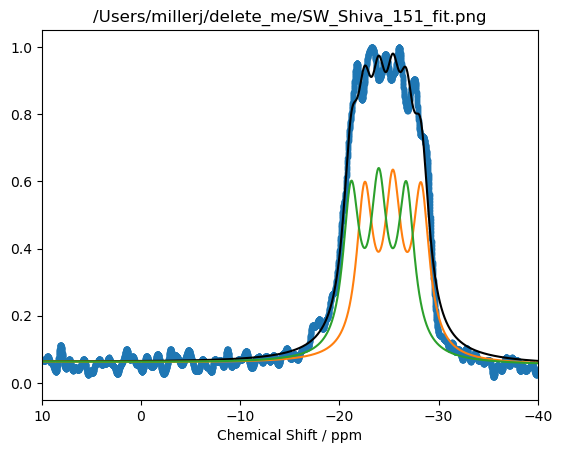

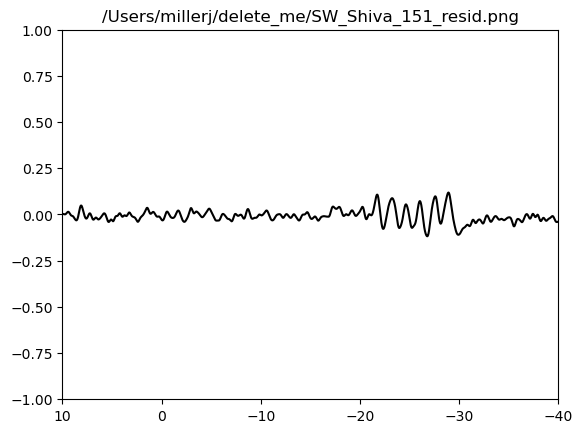

SW_Shiva_152
/Users/millerj/delete_me/SW_Shiva_152.txt


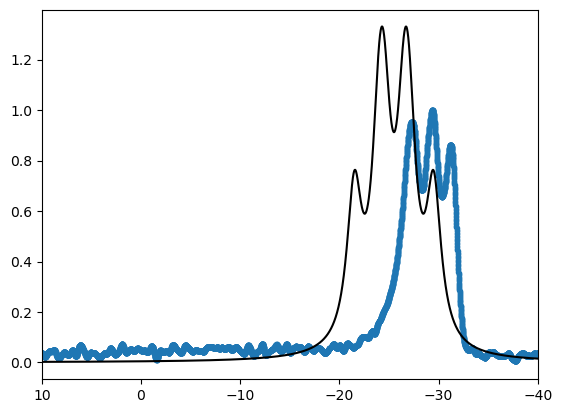

Finished with fitting
fit_center_1  -28.686575404297358      fit_split_1  1.996032090182233
fit_center_2  -29.403538217825922      fit_split_2  2.0051902980090053
fit_height  0.4706771494858141      fit_width  0.6151438617348598
fit_slope  0.00014985197025313562      fit_intercept  0.04605060894418543


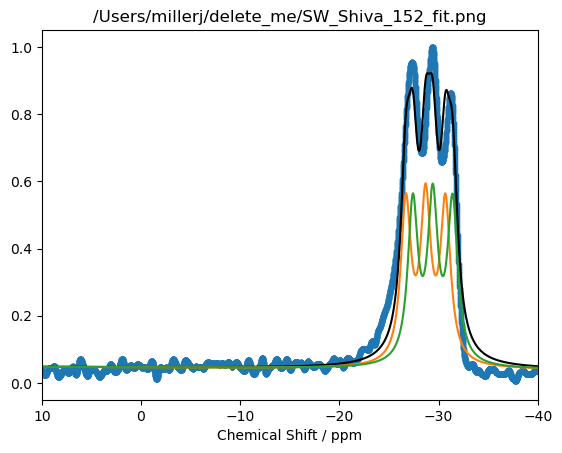

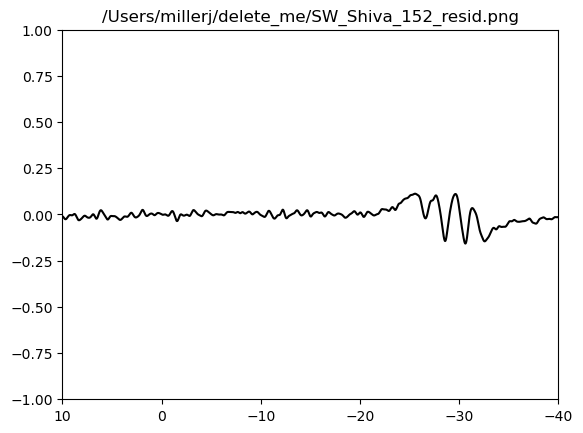

In [1]:
import os
import numpy as np
from numpy import empty
from numpy import zeros
import pandas as pd
from matplotlib import pyplot as plt

# curve-fit() function imported from scipy
from scipy.optimize import curve_fit
import warnings

def Lorentzian( x, x0, a, gam ):
    return a * gam**2 / ( gam**2 + ( x - x0 )**2)

def Lorentz_triplet( x, center, split, height, width ):
    return Lorentzian( x, center - split, height, width ) + \
                    Lorentzian( x, center, height, width ) + \
                    Lorentzian( x, center + split, height, width )

def multi_Lorentz( x, height, width, center_1, split_1, center_2, split_2, slope, intercept):
    # height = parameters[ 0 ]
    # width = parameters[ 1 ]
    # center_1 = parameters[ 2 ]
    # split_1 = parameters[ 3 ]
    # center_2 = parameters[ 4 ]
    # split_2 = parameters[ 5 ]
    # slope = parameters[ 6 ]
    # intercept = parameters[ 7 ]
    return Lorentz_triplet( x, center_1, split_1, height, width) + \
            Lorentz_triplet( x, center_2, split_2, height, width) + \
            (x * slope + intercept)

# This is set up for reading a one-dimensional input of y-data with well-defined x-data
# if a different frequency range is used, these will need to change
# numpy.linspace with the given arguments
# produce an array of num_points numbers between
# first_point and last_point, both inclusive
first_point = 100.061203
last_point = -106.0333844
num_points = 32768
xData = np.linspace(first_point, last_point, num_points)
file_path = "/Users/millerj/delete_me/"
list_filename = "file_list.txt"
out_filename = "fit_data.txt"
header_lines = 0 # number of header lines to expect in the data file

# other useful values
comma = ","

# put fit parameters into an array
# Initial guesses from experimental spectrum
init_params = []
peak_height = 0.6
init_params.append( peak_height )
peak_width = 0.9
init_params.append( peak_width )
cluster_1_center = -27
init_params.append( cluster_1_center )
cluster_1_split = 2.5
init_params.append( cluster_1_split )
cluster_2_center = -24
init_params.append( cluster_2_center )
cluster_2_split = 2.5
init_params.append( cluster_2_split)
background_slope = 0
init_params.append( background_slope )
background_intercept = 0
init_params.append( background_intercept )
print( init_params )

# this section of code tested making a triplet
triplet_1 = Lorentz_triplet(xData, cluster_1_center, cluster_1_split, peak_height, peak_width )
triplet_2 = Lorentz_triplet(xData, cluster_2_center, cluster_2_split, peak_height, peak_width )
print('len(xData) ',len(xData))
plt.plot( xData, triplet_1 + ( background_slope * xData + background_intercept ) )
plt.plot( xData, triplet_2 + ( background_slope * xData + background_intercept ) )

#read in the list of files to be processed
list_path = file_path + list_filename
with open(list_path) as f:
    files = [names.rstrip() for names in f.readlines()] # read filenames and remove the newline (\n) character from the end of each line

# set up comlumn headers in data output file
data_path = file_path + out_filename
    # print( data_path )
outfile = open( data_path, 'a' ) # open for append
header_string = 'fit_center_1'+ comma+ 'fit_split_1'+ comma + 'fit_center_2' + comma + 'fit_split_2' + comma + \
              'fit_height ' + comma + 'fit_width' + comma + 'fit_slope' + comma +  'fit_intercept' + '\n'
outfile.write( header_string )
outfile.write( '\n' ) # add a blank line
outfile.close()

for inputfile in files:
    filestem = inputfile.removesuffix( '.txt' ) 
    print( filestem )

    # read in the experimental data
    spectrum_file = file_path + filestem + '.txt'
    print( spectrum_file )
    
    # break
    
    yData = np.loadtxt( spectrum_file, dtype = 'float', skiprows = header_lines  )
#    with open(spectrum_file) as data_file:
#        text_data = [data_point.rstrip() for data_point in data_file.readlines()] # read datapoints and remove the newline (\n) character from the end of each line
#    #strip the header lines
#    if header_lines > 0:
#        del text_data[ 1 : header_lines ]
#    for data_point in text_data:
#        yData.append( float( data_point ) ) # convert to float
#        # print( data_point )
    
#    data_min = min( yData )
#    data_max = max( yData ) - data_min
#    yData = yData - data_min
#    yData = yData / data_max
#    for yData_point in yData:
    yData = yData - min( yData )  # remove any vertical offset
    yData = yData / max( yData )  # normalize
    
    # Plot the experimental data
    plt.plot(xData, yData, '.')
   # add the initial components to the plot
    start_fit = multi_Lorentz(xData, peak_height, peak_width, cluster_1_center, cluster_1_split, cluster_2_center, cluster_2_split, background_slope, background_intercept)
    plt.plot(xData, start_fit, 'black' )
    plt.xlim([10,-40])
    plt.show()

    
# curve_fit() function takes the test-function
# x-data and y-data as argument and returns 
# the coefficients a and b in param and
# the estimated covariance of param in param_cov
# print( init_params )
# print( len( xData ), len( yData ), len( init_params ) )

    end_params, param_cov = curve_fit( multi_Lorentz, xData, yData, init_params )
    print( 'Finished with fitting' )
    
# extract the individually optimized parameters from the curve_fit results
    fit_height = end_params[ 0 ]
    fit_width = end_params[ 1 ]
    fit_center_1 = end_params[ 2 ]
    fit_split_1 = end_params[ 3 ]
    fit_center_2 = end_params[ 4 ]
    fit_split_2 = end_params[ 5 ]
    fit_slope = end_params[ 6 ]
    fit_intercept = end_params[ 7 ]
    
    #print them...
    print( 'fit_center_1 ', fit_center_1, '    ', 'fit_split_1 ', fit_split_1 )
    print( 'fit_center_2 ', fit_center_2, '    ', 'fit_split_2 ', fit_split_2 )
    print( 'fit_height ', fit_height, '    ', 'fit_width ', fit_width )
    print( 'fit_slope ', fit_slope, '    ', 'fit_intercept ', fit_intercept )
 
    # and save them to a datafile
    outfile = open( data_path, 'a' ) # open for append
    outfile.write( inputfile + '\n' )  # give the spectrum source file
    data_string = str( fit_center_1 ) + comma + str( fit_split_1 ) + comma + str( fit_center_2 ) + comma + str( fit_split_2 ) + comma + \
                  str( fit_height ) + comma + str( fit_width ) + comma + str( fit_slope ) + comma + str( fit_intercept ) + '\n'
    outfile.write( data_string )
    outfile.write( '\n' ) # add a blank line
    outfile.close()
    
    # plot the data and fit results
    end_fit = multi_Lorentz(xData, fit_height, fit_width, fit_center_1, fit_split_1, fit_center_2, fit_split_2, fit_slope, fit_intercept )
    fit_triplet_1 = Lorentz_triplet(xData, fit_center_1, fit_split_1, fit_height, fit_width ) + (fit_slope * xData + fit_intercept )
    fit_triplet_2 = Lorentz_triplet(xData, fit_center_2, fit_split_2, fit_height, fit_width ) + (fit_slope * xData + fit_intercept )

    plt.plot( xData, yData, '.' )
    plt.plot( xData, end_fit, 'black')
    plt.plot( xData, fit_triplet_1 )
    plt.plot( xData, fit_triplet_2 )
    plt.xlabel( 'Chemical Shift / ppm' )
    plt.xlim( [ 10, -40 ] )
    label_text = filestem + '_fit'
    fit_plot_file = file_path + filestem + '_fit.png'
    plt.title( fit_plot_file )
    plt.savefig( fit_plot_file )
    plt.show( )

    residuals = yData - end_fit
    plt.plot( xData, residuals, 'black' )
    plt.xlim( [ 10, -40 ] )
    plt.ylim( [ -1 , 1 ] )
    label_text = filestem + '_resid'
    resid_plot_file = file_path + filestem + '_resid.png'
    plt.title( resid_plot_file )
    plt.savefig( resid_plot_file )
    plt.show()


[0.6, 0.9, -27, 2.5, -24, 2.5, 0, 0]
min(yData)  0.0
max(yData)  1.0
